# Calculating emps and dilution in ANHA4-EXH001

This notebook summerized my work of calculating NEMO variable emp (evaporation minus preciptation) through salt-flux and seasurface salinity. Technical details are listed on 
<a href="http://ccar-modeling-documentation.readthedocs.org/en/latest/code-notes/TRC/Calculate_emps_ANHA4.html">here</a>.


In [1]:
import sys
sys.path.insert(0, '_libs/')

In [53]:
import glob
import scipy.io
import datetime
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [5]:
ANHA4_MAT=scipy.io.loadmat('_data/Exchange/coord_ANHA4.mat')
nav_lat = ANHA4_MAT['nav_lat']
nav_lon = ANHA4_MAT['nav_lon']

In [6]:
safl_name = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/iocesafl_monmean.nc'
sss_name  = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/isssalin_monmean.nc'

In [38]:
safl_obj = nc.Dataset(safl_name)
safl = np.transpose(safl_obj.variables['iocesafl'][:], [0, 2, 1])
sss_obj = nc.Dataset(sss_name)
sss = np.transpose(sss_obj.variables['isssalin'][:], [0, 2, 1])

In [39]:
emps=-1.0*safl*34.7/(3600.0*24*(sss+1.0e-16))

In [40]:
bound_MAT=scipy.io.loadmat('_data/Exchange/Ba_boundary_ANHA4.mat')
domain = bound_MAT['domain']

In [42]:
for i in range(144):
    temp = emps[i, :, :]
    temp[domain==0]=np.nan

In [43]:
lev = np.array([-9, -6, -3, -1, 1, 3, 6, 9])/5.0

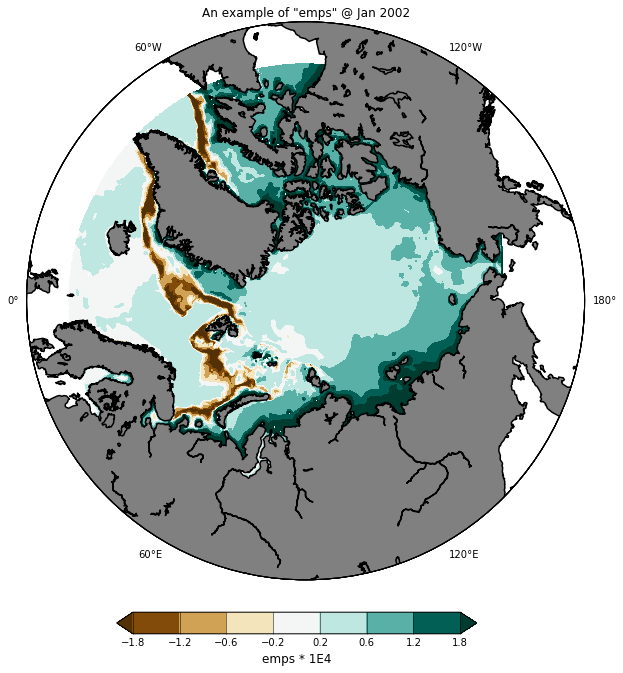

In [46]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')

x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, emps[0, :, :]*1e4, lev, cmap=plt.cm.BrBG, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps * 1E4', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

ax.set_title('An example of "emps" @ Jan 2002')

In [54]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

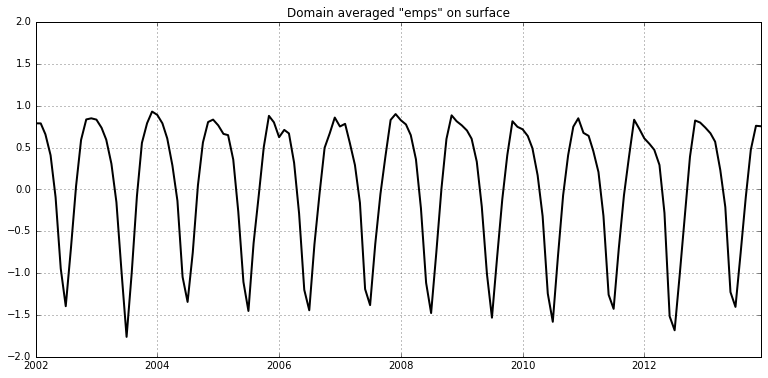

In [57]:
fig=plt.figure(figsize=(13, 6)); ax=plt.gca()
ax.set_ylim([-2.0, 2.0]); ax.grid()
ax.plot(date_list, np.mean(np.mean(emps*1e4, 1), 1), 'k-', lw=2.0)
ax.set_title('Domain averaged "emps" on surface')